## Chapter 6
# Transfer Function Analysis

## Transfer Function Analysis Problems

**1. Show that**

$\text{Flip}(h * \text{Flip}(x)) = \text{Flip}(h) * x$,

**where $\text{Flip}_n(x) \triangleq x(-n)$. That is, show that time reversing a signal $x$, applying a filter $h$ and reversing the resulting output $y$ is equivalent to convolving the unflipped signal $x$ with the flipped impulse response $h(-n)$.**

$\begin{array}{ll}
\text{Flip}((h * \text{Flip}(x))_n) &= \text{Flip}\left[\sum_\limits{m=0}^\limits{\infty}h(m)x(-(n-m))\right]\\
&= \sum_\limits{m=0}^\limits{\infty}h(-m)x(n-m)\\
&= (\text{Flip}(h) * x)_n
\end{array}$

**For the filter**

$H(z) = \frac{1}{1-\frac{1}{10}z^{-1}}$

**a) Find the impulse response.**

The impulse response can be obtained by inspection, noting that if

$\mathcal{Z}_z(h) = \frac{r}{1-pz^{-1}}$,

then $h(n) = rp^n$. _(See section 6.8.2 Inverting the Z Transform on p132)_.

Thus, $h(n) = \left(\frac{1}{10}\right)^n$.

Let's confirm this by taking the $z$-transform of the impulse response:

$\begin{array}{ll}
\mathcal{Z}_z(h) &\triangleq \sum_\limits{n=0}^\limits{\infty}h(n)z^{-n}\\
&= \sum_\limits{n=0}^\limits{\infty}\left(\frac{1}{10}\right)^nz^{-n}\\
&= \sum_\limits{n=0}^\limits{\infty}\left[\frac{1}{10}z^{-1}\right]^n\\
&= \frac{1}{1-\frac{1}{10}z^{-1}} &\text{ using closed form of infinite geometric series}\\
\end{array}$

Let's verify this in a plot:

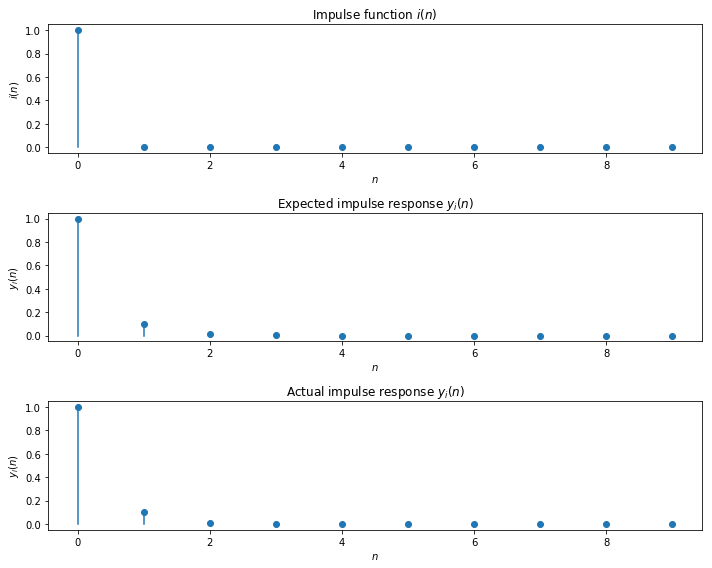

In [1]:
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt
%matplotlib inline

n = np.arange(10)
expected_impulse_response = (1/10) ** n

B = [1]
A = [1, -1/10]
impulse = np.array([1.0] + [0.0] * 9)
actual_impulse_response = lfilter(B, A, impulse)

plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.title('Impulse function $i(n)$')
plt.stem(n, impulse, basefmt='none')
plt.xlabel('$n$')
plt.ylabel('$i(n)$')

plt.subplot(312)
plt.title('Expected impulse response $y_i(n)$')
plt.stem(n, expected_impulse_response, basefmt='none')
plt.xlabel('$n$')
plt.ylabel('$y_i(n)$')

plt.subplot(313)
plt.title('Actual impulse response $y_i(n)$')
plt.stem(n, actual_impulse_response, basefmt='none')
plt.xlabel('$n$')
plt.ylabel('$y_i(n)$')
plt.tight_layout()

**b) Find the step response.**

The step function is defined as

$s(n) \triangleq \begin{cases}\begin{array}{ll}1, &n >= 0\\0, &n < 0.\end{array}\end{cases}$

We can find the output of the filter in response to a step input by convolving the input with the filter's impulse response:

$\begin{array}{ll}
y_{step}(n) &= \sum_\limits{m=0}^\limits{\infty}h(m)s(n-m)\\
&= \sum_\limits{m=0}^\limits{n}h(m)s(n-m) &\text{ since }s(n) = 0, n < 0\\
&= \sum_\limits{m=0}^\limits{n}\left(\frac{1}{10}\right)^m &\text{ since }s(n) = 1, n >= 0\\
&= \frac{1-\left(\frac{1}{10}\right)^{n+1}}{1-\frac{1}{10}} &\text{ using closed-form sum of a truncated geometric series}\\
&= \frac{10}{9}\left(1-\frac{1}{10^{n+1}}\right) &\text{ simplifying...}\\
&= \frac{10-10^{-n}}{9}\\
\end{array}$

Again, let's verify this result:

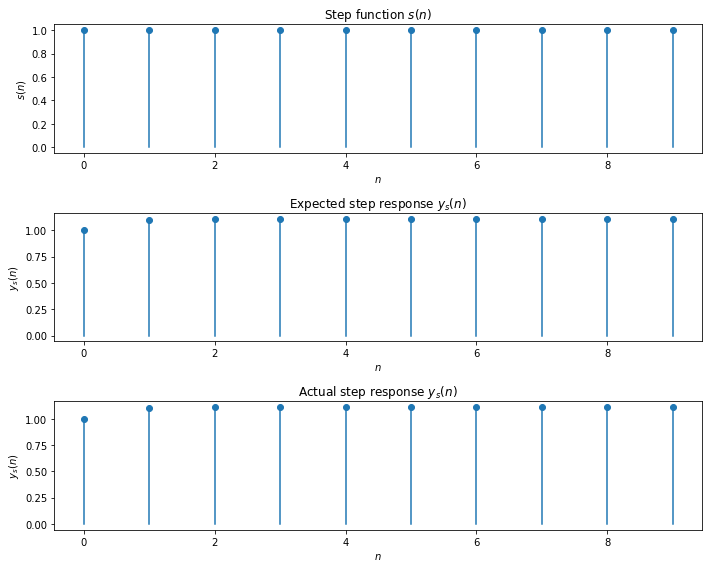

In [2]:
n = np.arange(10)
expected_step_response = (10 - 10.0 ** -n)/9

B = [1]
A = [1, -1/10]
step = np.ones(n.size)
actual_step_response = lfilter(B, A, step)

plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.title('Step function $s(n)$')
plt.stem(n, step, basefmt='none')
plt.xlabel('$n$')
plt.ylabel('$s(n)$')

plt.subplot(312)
plt.title('Expected step response $y_s(n)$')
plt.stem(n, expected_step_response, basefmt='none')
plt.xlabel('$n$')
plt.ylabel('$y_s(n)$')

plt.subplot(313)
plt.title('Actual step response $y_s(n)$')
plt.stem(n, actual_step_response, basefmt='none')
plt.xlabel('$n$')
plt.ylabel('$y_s(n)$')
plt.tight_layout()

**c) Sketch the pole-zero diagram**

Considering the transfer function $H(z)$ in its general rational form,

$H(z) = \frac{B(z)}{A(z)} = \frac{b_0 + b_1z^{-1} + \cdots + b_Mz^{-M}}{1 + a_1z^{-1} + \cdots + a_Nz^{-N}}$,

We can see that the filter $H(z) = \frac{1}{1-\frac{1}{10}z^{-1}}$ has no zeros ($b_n = 0, n > 0$), and one pole at $a_1 = \frac{1}{10}$.

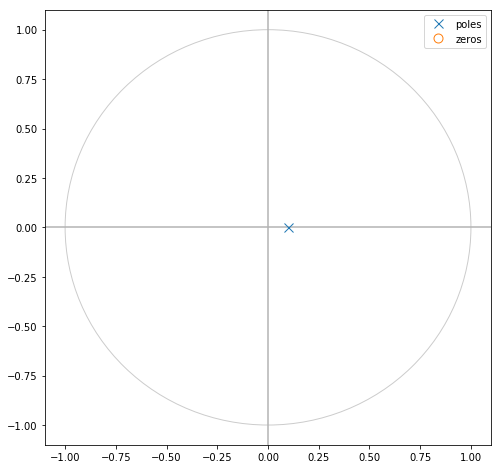

In [3]:
from scipy.signal import tf2zpk
from plot_utils import zplane

zeros, poles, gain = tf2zpk(B, A)

plt.figure(figsize=(8, 8))
zplane(zeros, poles)

**d) Find the frequency of maximum gain.**

The frequency of maximum gain will be the frequency with the highest amplitude response.

That is, it will be the maximum magnitude of its transfer function

$H(z) = \frac{1}{1-\frac{1}{10}z^{-1}}$

evaluated along the unit circle.

$\begin{align}
argmax_\omega G(\omega) &= argmax_\omega \left|H(\omega)\right|\\
&= argmax_f \left|\frac{1}{1-\frac{1}{10}e^{-j 2 \pi f}}\right|\\
\end{align}$

The maximum will be when the denominator is smallest. Since $-1 \leq \text{Re}\{e^{-j2 \pi f}\} \leq 1, \forall f \in \mathbb{R}$, this will occur when $e^{-j 2 \pi f} = 1$, i.e. when $f = 0$.

_Verifying with a plot..._

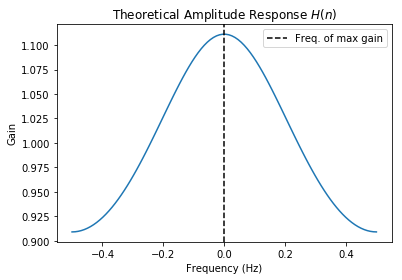

In [4]:
N = 100
f = np.linspace(-0.5, 0.5, N)
z = np.exp(-1j * 2 * np.pi * f)

H = 1/(1 - (1/10) * z ** -1)
plt.plot(f, np.abs(H))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.axvline(x=0, linestyle='--', color='k', label='Freq. of max gain')
plt.legend()
_  = plt.title('Theoretical Amplitude Response $H(n)$')

Taking the DFT of the filter's impulse response should give the same result:

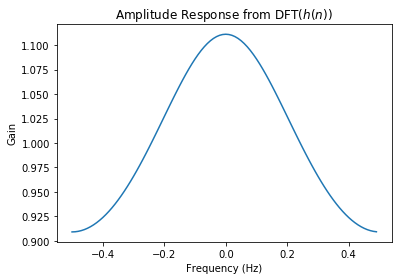

In [5]:
from numpy.fft import fft, fftfreq, fftshift

impulse_response = (1/10) ** np.arange(N)
plt.plot(np.sort(fftfreq(N)), fftshift(np.abs(fft(impulse_response))))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
_  = plt.title('Amplitude Response from DFT$(h(n))$')

**e) Find the maximum gain.**

Considering the filter output $y$ given by the convolution of its impulse response $h$ with an arbitrary _constant_, _causal_ signal $x$,

$\begin{array}{ll}
\frac{y(n)}{x(n)} &= \frac{1}{x(n)}(h *x)_n\\
&= \frac{1}{x(n)}\sum_\limits{m=0}^\limits{\infty}h(m)x(n-m)\\
&= \frac{1}{x(n)}\sum_\limits{m=0}^\limits{n}h(m)x(n-m) &\text{ since }x\text{ is causal and so }x(n) = 0, n < 0\\
&= \sum_\limits{m=0}^\limits{n}h(m)\frac{x(n-m)}{x(n)}\\
&= \sum_\limits{m=0}^\limits{n}h(m) &\text{ since }x\text{ is constant}\\
&= \sum_\limits{m=0}^\limits{n}\left(\frac{1}{10}\right)^m\\
&= \frac{1-\left(\frac{1}{10}\right)^{n+1}}{1-\frac{1}{10}} &\text{ using closed-form sum of a truncated geometric series}\\
&= \frac{10}{9}\left(1-\frac{1}{10^{n+1}}\right) &\text{ simplifying...}\\
&= \frac{10-10^{-n}}{9}\\
\end{array}$

This is, of course, the same as the result for the step response. This expression is monotonically increasing and approaches $\frac{10}{9}$ as $n \to \infty$.

**f) Find the frequency of minimum gain.**

The frequency of minimum gain will be the frequency with the lowest amplitude response.

That is, it will be the minimum magnitude of its transfer function

$H(z) = \frac{1}{1-\frac{1}{10}z^{-1}}$

evaluated along the unit circle.

$\begin{align}
argmin_\omega G(\omega) &= argmin_f \left|\frac{1}{1-\frac{1}{10}e^{-j 2 \pi f}}\right|\\
\end{align}$

The minimum will occur when the denominator is _largest_. Since $-1 \leq \text{Re}\{e^{-j2 \pi f}\} \leq 1, \forall f \in \mathbb{R}$, this will occur when $e^{-j 2 \pi f} = -1$, i.e. when $f = \pm\frac{1}{2}$ (or $f = \pm\frac{f_s}{2}$ if $f_s \neq 1$).

_This can be clearly seen in the plots above (under question **1d**)._

**g) Find the minimum gain.**

For a causal signal, the minimum gain will occur at $n = argmin_n\frac{10-10^{-n}}{9}, n \geq 0$.

This will occur when the numerator is _smallest_, i.e. when $n = 0$ and the gain is $\frac{10-10^{0}}{9} = 1$.

_See the plot above for the step response (question **1b**)._

**h) Find the phase delay in samples at half the sampling rate. Explain this result in terms of the pole-zero diagram.**

$\begin{array}{ll}
\Theta(\omega) &= \angle{H(e^{j\omega T})}\\
&= \angle{H(e^{j2\pi f/f_s})}\\
&= \angle{H(e^{j\pi})} &\text{ setting }f=\frac{f_s}{2}\\
&= \angle{\frac{1}{1-\frac{1}{10}\left(e^{j\pi}\right)^{-1}}}\\
&= \angle{\frac{1}{1-\frac{e^{-j\pi}}{10}}}\\
&= \angle{\frac{1}{1+\frac{1}{10}}}\\
&= 0
\end{array}$

Notice in the pole-zero diagram above that the single pole occurs at angle $\theta = 0$.

_(TODO This could use some further justification.)_

**3. Prove that a stable, causal, recursive digital filter cannot have a symmetric impulse response $h(n)$.**

Since $h(n)$ is a stable IIR filter, it must asymptotically approach $0$ as $n \to \infty$. _(pg. 123)_, it cannot be symmetric since for any $n, m \in \mathbb{N}, n \geq m$, $\left|h(n - m)\right| > \left|h(n + m)\right|$. meaning $h$ cannot be symmetric around point $m$.

**4. _Canceling Nonlinear Phase:_ ...**

_TODO I have to admit I don't fully understand some parts of this lengthy question. Hopefully its meaning will become clearer to me in the future._

**5. _Interchanging Sections:_ Since the transfer functions of series-connected filter stages just multiply, the transfer function is unaffected if we permute the order of the sections. Use this fact to show that Fig. 5.1a is equivalent to Fig 5.1b. (Hint: Find a way to share delays.)**

Here is the signal flow graph of Fig 5.1a/b:

![](images/img532.png)

The difference equation is given as $y(n) = b_0x(n) + b_1x(n-1) + b_2x(n-2) - a_1y(n-1)-a_2y(n-2)$. (This can also be derived by simply interpretting the signal flow diagrams above.

Because of the linearity of the $z$-transform operation, the "diagram remains true if it is converted to the frequency domain by replacing all time-domain signals by their respective $z$ transforms." ([Quote from the book](https://ccrma.stanford.edu/~jos/filters/Signal_Flow_Graph_I.html) directly above the diagram.) That is, we can rewrite the difference equation as

$Y(z) = b_0X(z) + b_1z^{-1}X(z) + b_2z^{-2}X(z) - a_1z^{-1}Y(z)-a_2z^{-2}Y(z)$.

(making use of the [_shift theorem_](https://ccrma.stanford.edu/~jos/filters/Shift_Theorem.html)). Rearranging, 

$\begin{align}
Y(z) &= b_0X(z) + z^{-1}\left(b_1X(z) - a_1Y(z)\right) + z^{-2}\left(b_2X(z) -a_2Y(z)\right)\\
&= b_0X(z) + z^{-1}\left[\left(b_1X(z) - a_1Y(z)\right) + z^{-1}\left(b_2X(z) -a_2Y(z)\right)\right].\\
\end{align}$


**6. _Convolving Noncausal Signals:_ Work out the shift and convolution theorems for the case of noncausal signals and the bilateral $z$ transform. State any needed conditions to ensure existence of the convolution and $z$ transforms.**

The bilateral $z$ transform is defined as

$\mathcal{Z}_z\{x\} \triangleq \sum_\limits{n=-\infty}^\limits{\infty}x(n)z^{-n}$

_Shift theorem:_

$\begin{array}{ll}
\mathcal{Z}_z\{\text{Shift}_\Delta\{x\}\} &\triangleq \sum_\limits{n=-\infty}^\limits{\infty}x(n-\Delta)z^{-n}\\
&=\sum_\limits{m=-\infty}^\limits{\infty}x(m)z^{-(m+\Delta)} &(m \triangleq n - \Delta)\\
&=\sum_\limits{m=-\infty}^\limits{\infty}x(m)z^{-m}z^{-\Delta}\\
&=z^{-\Delta}\sum_\limits{m=-\infty}^\limits{\infty}x(m)z^{-m}\\
&\triangleq z^{-\Delta}X(z)\\
\end{array}$

This is the exact same result as the shift theorem for causal signals, except we do not need/use the causality assumption for $x$.

_Convolution theorem:_

$\begin{array}{ll}
\mathcal{Z}_z\{x * y\} &\triangleq \sum_\limits{n=-\infty}^\limits{\infty}\left(x * y\right)_nz^{-n}\\
&= \sum_\limits{n=-\infty}^\limits{\infty}\sum_\limits{m=-\infty}^\limits{\infty}x(m)y(n-m)z^{-n}\\
&= \sum_\limits{m=-\infty}^\limits{\infty}x(m)\sum_\limits{n=-\infty}^\limits{\infty}y(n-m)z^{-n}\\
&= \left(\sum_\limits{m=-\infty}^\limits{\infty}x(m)z^{-m}\right)Y(z) &\text{ (by the Shift Theorem)}\\
&\triangleq X(z)Y(z)
\end{array}$

For the bilateral $z$ transform to exist for a signal $x$, $\sum_\limits{n=-\infty}^\limits{\infty}x(n)z^{-n}$ must converge. For it to converge, it must converge on both sides. That is,

$\sum_\limits{n=0}^\limits{\infty}x(n)z^{-n}$ must converge, and

$\begin{array}{ll}
\sum_\limits{n=-\infty}^\limits{0}x(n)z^{-n} &= \sum_\limits{m=\infty}^\limits{0}x(-m)z^{m} &(n \triangleq -m)\\
&= \sum_\limits{m=0}^\limits{\infty}x(-m)z^{m}\\
\end{array}$

must converge. We've seen that for the positive unilateral $z$ transform to exist, we need $x$ to behave asymptotically like a decaying exponential with magnitude $|x(n)|$ < $|z|^n$, so that $\frac{|x(n)|}{|z|^n} \to 0$ as $n \to \infty$.

For the anticausal unilateral $z$ transform to exist, we now need $\frac{|z|^n}{|x(n)|} \to 0$ as $n \to \infty$ for convergence, so we want an "exploding" anticausal exponential with $|x(n)|$ > $|z|^n$.

### Partial Fraction Expansion Problems

**7. Given**

$H(z) = \frac{b_0 + b_1z^{-1} + b_2z^{-2}}{1+a_1z^{-1}}$,

**perform each of the two types of partial fraction expansion to show**

$\begin{align}
H(z) &= \left(\frac{b_1}{a_1} - \frac{b_2}{a_1^2}\right) + \frac{b_2}{a_1}z^{-1} + \frac{b_0 - \frac{b_1}{a_1} + \frac{b_2}{a_1^2}}{1+a_1z^{-1}}\\
&= b_0 + (b_1-b_0a_1)z^{-1} + z^{-2}\frac{b_o-a_1b_1 + a_1^2b_0}{1+a_1z^{-1}}
\end{align}$

Here we have $M = 2, N = 1$.  Since $M \geq N$, we first need to extract an order 1 (length 2) FIR part via long division. Let $d = z^{-1}$ and rewrite $H(z)$ as

$H(d^{-1}) = \frac{d^2b_2 + db_1 + b_0}{da_1 + 1}$.

Then long division gives _(apologies for weird formatting)_

$\begin{array}{lr}
&\begin{array}{lll}&&&d\frac{b_2}{a_1} &&\frac{b_1}{a_1}-\frac{b_2}{a_1^2}\end{array}\\
da_1 + 1 &\overline{\begin{array}{lll}d^2b_2 &+db_1 &+b_0\\d^2b_2 &+d\frac{b_2}{a_1}\\&d\left(b_1-\frac{b_2}{a_1}\right) &+b_0\\&d\left(b_1-\frac{b_2}{a_1}\right) &+\left(\frac{b_1}{a_1}-\frac{b_2}{a_1^2}\right)\end{array}}\\
&\overline{b_0 - \left(\frac{b_1}{a_1}-\frac{b_2}{a_1^2}\right)}
\end{array}$

The quotient is

$\begin{align}
Q &= d\frac{b_2}{a_1}+\frac{b_1}{a_1}-\frac{b_2}{a_1^2}\\
&= \left(\frac{b_1}{a_1}-\frac{b_2}{a_1^2}\right) + \frac{b_2}{a_1}z^{-1}
\end{align}$,

and the remainder is

$\begin{align}
R &= b_0 - \left(\frac{b_1}{a_1}-\frac{b_2}{a_1^2}\right)\\
&= b_0 - \frac{b_1}{a_1} + \frac{b_2}{a_1^2}.\\
\end{align}$

Thus, $H(z)$ can be expressed as

$\begin{align}
H(z) &= Q + \frac{R}{A(z)}\\
&= \left(\frac{b_1}{a_1}-\frac{b_2}{a_1^2}\right) + \frac{b_2}{a_1}z^{-1} + \frac{b_0 - \frac{b_1}{a_1} + \frac{b_2}{a_1^2}}{1+a_1z^{-1}}.
\end{align}$

We are done with the first type of partial fraction expansion. The other option the question is looking for is to find the "delayed form" of the PFE, which is obtained by leaving the coefficients in their original order, as a ratio of polynomials in $z$:

$\begin{align}
H(z) &= \frac{b_0 + b_1z^{-1} + b_2z^{-2}}{1+a_1z^{-1}}\\
&= z^{-2}\frac{b_0z^2 + b_1z^1 + b_2}{z^2+a_1z^{1}},\\
\end{align}$

and to perform long division. I ended up with:

$Q = b_0$ and $R = z^1(b_1-a_1b_0)+b_2$, giving

$\begin{align}
H(z) &= z^{-2}\left(Q + \frac{R}{A}\right)\\
&= z^{-2}\left(b_0 + \frac{z^1(b_1-a_1b_0)+b_2}{z^2+a_1z^{1}}\right)\\
&= z^{-2}\left(b_0 + z^{-2}\frac{z^1(b_1-a_1b_0)+b_2}{1+a_1z^{-1}}\right)\\
\end{align}$

TODO: I can't seem to get this looking like the second form in the question. It looks sort of close, but not quite. Either I have made a mistake I can't find, or the author has, or I'm just not seeing the right simplifications/substitutions.

**8. For the $z$ transform**

$\begin{align}
X(z) &= \frac{1}{(1-az^{-1})(1-bz^{-1})}\\
&= \frac{a^{-1}b^{-1}}{(z^{-1}-a^{-1})(z^{-1}-b^{-1})}\\
&= \frac{z^2}{(z-a)(z-b)}
\end{align}$

**a) Find the partial fraction expansion, viewing $X(z)$ as a ratio of polynomials in $z^{-1}$.**

The poles of $X(z)$ are $p_1 = a$ and $p_2 = b$.

The corresponding residues are then

$\begin{align}
r_1 &= (1 - az^{-1})H(z)\rvert_{z=a} = \left.\frac{1 - az^{-1}}{(1-az^{-1})(1-bz^{-1})}\right\rvert_{z=a}\\
&= \left.\frac{1}{1-bz^{-1}}\right\rvert_{z=a} = \frac{1}{1-\frac{b}{a}} = \frac{a}{a-b}, \text{ and}\\
\end{align}$

$\begin{align}
r_2 &= (1 - bz^{-1})H(z)\rvert_{z=b} = \left.\frac{1 - bz^{-1}}{(1-az^{-1})(1-bz^{-1})}\right\rvert_{z=b}\\
&= \left.\frac{1}{1-az^{-1}}\right\rvert_{z=b} = \frac{1}{1-\frac{a}{b}} = \frac{b}{b-a}.\\
\end{align}$

This gives us

$\begin{align}
H(z) &= \sum_\limits{i=1}^\limits{N}\frac{r_i}{1-p_iz^{-1}}\\
&= \frac{r_1}{1-p_1z^{-1}} + \frac{r_2}{1-p_2z^{-1}}\\
&= \frac{\frac{a}{a-b}}{1-az^{-1}} + \frac{\frac{b}{b-a}}{1-bz^{-1}}\\
&= \frac{a}{(a-b)(1-az^{-1})} + \frac{b}{(b-a)(1-bz^{-1})}\\
\end{align}$

**b) Find a different partial fraction expansion, viewing $X(z)$ as a polynomial in $z$. [Hint: this one starts out "improper".]**

First we extract the FIR part of the polynomial by long division. In this case, it is easy to see that the given denominator,

$A(z) = (z-a)(z-b) = z^2 - z(a+b) + ab$,

goes into the numerator,

$B(z) = z^2$,

$Q=1$ times with a remainder of $R = z(a+b)-ab$. Thus, we can express the transfer function as

$\begin{align}
H(z) &= Q + \frac{R}{A(z)}\\
&= 1 + \frac{z(a+b)-ab}{(z-a)(z-b)} = 1 + \frac{za + zb - ab}{(z-a)(z-b)}\\
\end{align}$

Now we have the transfer function in a from where only the last term is greater than first order, and that term is in "proper" order.

I must admit that I had some trouble using the method in the book (used with success in the first part of this problem) to find the residuals here, and got some inspiration from Wolfram Alpha to find this (non-intuitive!) leap:

$\begin{align}
H(z) &= 1 + \frac{za + zb - ab}{(z-a)(z-b)}\\
&= 1 + \frac{(a-b)(za + zb - ab)}{(a-b)(z-a)(z-b)}\\
&= 1 + \frac{za^2 - zb^2 - a^2b + ab^2}{(a-b)(z-a)(z-b)}\\
&= 1 + \frac{a^2(z-b) - b^2(z-a)}{(a-b)(z-a)(z-b)}\\
&= 1 + \frac{a^2}{(a-b)(z-a)} - \frac{b^2}{(a-b)(z-b)}\\
\end{align}$

This is a sum of first-order polynomials like we want!

**c) Find the inverse $z$ transform from the partial fraction expansion of the previous problem, and verify it gives the same numbers for $n = 0,1,2,...$.**

Using the result from part **(a)**, since it is more clearly in the form $H_i(z) = \frac{r_i}{1-p_iz^{-1}}$,

we have that

$\begin{array}{ll}
h(n) &= \sum_\limits{i=1}^\limits{N}h_i(n), &n=0,1,2,...\\
&= \sum_\limits{i=1}^\limits{N}r_ip_i^n\\
&= r_1p_1^n + r_2p_2^n\\
&= \frac{a}{a-b}a^n + \frac{b}{b-a}b^n\\
&= \frac{a^{n+1}}{a-b} + \frac{b^{n+1}}{b-a}\\
\end{array}$.

I'm not sure what the question means by "verify it gives the same numbers ...". I may have done something very wrong here, but clearly this will in general produce different values for each $n$. Maybe it means same numbers for each of the partial expansions?

**9. _Partial Fraction Expansion in Matlab:_ Given**

$H(z) = \frac{0.5+0.5z^{-1}+0.25z^{-2}}{1+0.5z^{-1}+0.5z^{-2}+0.75z^{-3}}$,

**verify that the partial fraction expansion of the filter has the same frequency response by following the steps below:**

**a) Find the residues and poles using the `residuez` function in Matlab**

**b) Obtain the frequency responses of three one-pole filters using the residues and the poles found in the previous problem, and sum them to get the total frequency response of the filter (in Matlab).**

**c) Plot the amplitude response in dB and the phase response in degrees of the filter using `subplot` to align them vertically.**

**d) Plot the frequency response of the original filter using the `freqz` function, and compare it with that obtained in the previous problem.**

`scipy` has an equivalent [`residuez`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.residuez.html) function.

In [6]:
from scipy.signal import residuez

B =[0.5, 0.5, 0.25]
A = [1, 0.5, 0.5, 0.75]
r, p, k = residuez(B, A)

In [7]:
print(r)

[ 0.10126801+0.j          0.19936599-0.14614908j  0.19936599+0.14614908j]


In [8]:
print(p)

[-0.88802272+0.j          0.19401136+0.89829426j  0.19401136-0.89829426j]


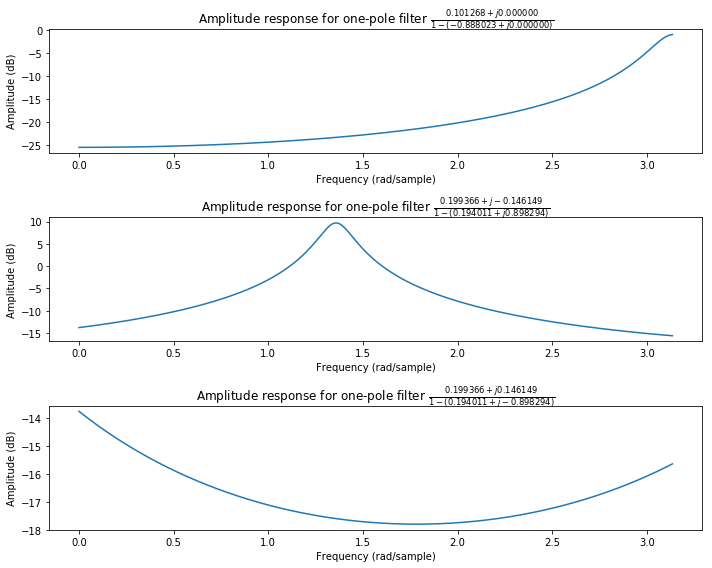

In [9]:
from scipy.signal import freqz
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(p.size)
fig.set_size_inches(10, 8)

Nfft = 512
summed_response = np.zeros(Nfft, dtype=complex)
for i in range(p.size):
    normalized_frequencies, response = freqz(r[i], [1, -p[i]], worN=Nfft)
    summed_response += response
    axes[i].plot(normalized_frequencies, 20 * np.log10(abs(response)))
    axes[i].set_ylabel('Amplitude (dB)')
    axes[i].set_xlabel('Frequency (rad/sample)')
    axes[i].set_title('Amplitude response for one-pole filter $\\frac{%f + j%f}{1-(%f + j%f)}$' % (r[i].real, r[i].imag, p[i].real, p[i].imag))

plt.tight_layout()

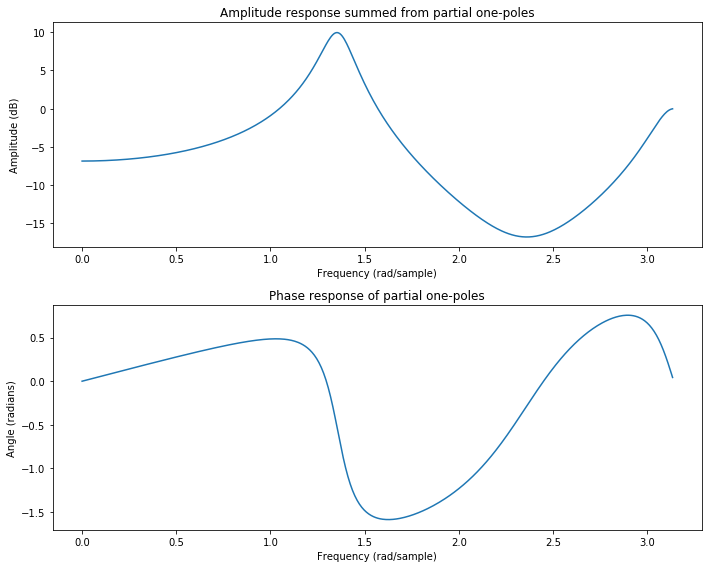

In [10]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(normalized_frequencies, 20 * np.log10(abs(summed_response)))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.title('Amplitude response summed from partial one-poles')

plt.subplot(212)
plt.plot(normalized_frequencies, np.unwrap(np.angle(summed_response)))
plt.ylabel('Angle (radians)')
plt.xlabel('Frequency (rad/sample)')
plt.title('Phase response of partial one-poles')
plt.tight_layout()

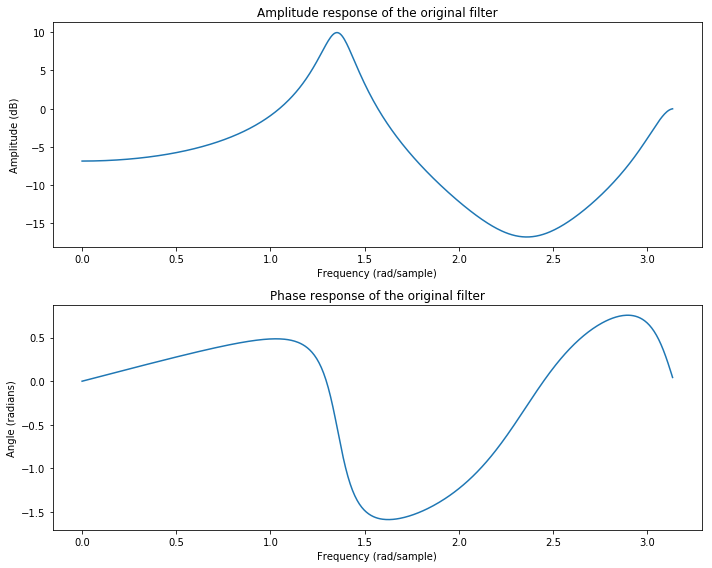

In [11]:
normalized_frequencies, response = freqz(B, A, worN=Nfft)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(normalized_frequencies, 20 * np.log10(abs(response)))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.title('Amplitude response of the original filter')

plt.subplot(212)
plt.plot(normalized_frequencies, np.unwrap(np.angle(response)))
plt.ylabel('Angle (radians)')
plt.xlabel('Frequency (rad/sample)')
plt.title('Phase response of the original filter')
plt.tight_layout()